In [1]:
# Clinical Regression for MST data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
from statsmodels.formula.api import ols
from scipy.stats import ttest_rel
from pingouin import ttest, normality, wilcoxon

from matplotlib import rcParams
rcParams['font.family'] = 'Helvetica'

In [3]:
# load dataframe
MST_path = '../saved_files_appeal/mst_files/mst_clin_eeg_diff.csv'
MST_clin_eeg_diff = pd.read_csv(MST_path, index_col=0)

MST_path_pre = '../saved_files_appeal/mst_files/mst_clin_eeg_pre.csv'
MST_clin_eeg_pre = pd.read_csv(MST_path_pre)

/Users/sydneysmith/opt/anaconda3/envs/mst-ect/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
MST_clin_eeg_diff.columns

Index(['patient', 'HAMD_TotalPre', 'HAMD_TotalPost', 'n_TxsReceived',
       'HAMD_diff', 'HAMD_ratio', 'delta_cf', 'delta_bw', 'delta_amp',
       'delta_bp', 'theta_cf', 'theta_bw', 'theta_amp', 'theta_bp', 'alpha_cf',
       'alpha_bw', 'alpha_amp', 'alpha_bp', 'offset', 'exponent',
       'delta_present', 'ch_delta_perc', 'theta_present', 'ch_theta_perc'],
      dtype='object')

In [39]:
formula = 'HAMD_ratio ~ exponent:n_TxsReceived + exponent + ch_theta_perc'

model = ols(formula, MST_clin_eeg_diff).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             HAMD_ratio   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     1.768
Date:                Tue, 09 May 2023   Prob (F-statistic):              0.211
Time:                        15:03:40   Log-Likelihood:                 4.5019
No. Observations:                  15   AIC:                            -1.004
Df Residuals:                      11   BIC:                             1.828
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

/Users/sydneysmith/opt/anaconda3/envs/mst-ect/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [54]:
responders_df = MST_clin_eeg_diff[MST_clin_eeg_diff['HAMD_TotalPost']<30.0]

In [58]:
responders_df

,patient,HAMD_TotalPre,HAMD_TotalPost,n_TxsReceived,HAMD_diff,HAMD_ratio,delta_cf,delta_bw,delta_amp,delta_bp,...,alpha_cf,alpha_bw,alpha_amp,alpha_bp,offset,exponent,delta_present,ch_delta_perc,theta_present,ch_theta_perc
0,9,23,19.0,24,4.0,0.173913,NaN,NaN,NaN,-0.391264,...,0.185397,-2.038570,0.070322,-0.282926,-0.445872,-0.251241,-1.0,-0.047619,9.0,0.428571
2,18,24,27.0,24,-3.0,-0.125000,NaN,NaN,NaN,-0.070714,...,0.121920,-0.140817,-0.120242,-0.132427,-0.130354,-0.082965,-0.0,-0.000000,-14.0,-0.666667
5,33,26,19.0,24,7.0,0.269231,NaN,NaN,NaN,0.585073,...,-0.018767,0.180875,-0.235333,-0.024690,0.580304,0.535556,7.0,0.333333,-0.0,-0.000000
7,40,24,11.0,24,13.0,0.541667,NaN,NaN,NaN,0.224554,...,0.694014,0.984682,0.097648,0.015390,0.330098,0.386498,-0.0,-0.000000,-0.0,-0.000000
8,46,29,21.0,24,8.0,0.275862,NaN,NaN,NaN,-0.049137,...,-0.036954,-0.196105,-0.056855,-0.144221,-0.021992,0.083870,-0.0,-0.000000,5.0,0.238095
11,66,26,19.0,24,7.0,0.269231,NaN,NaN,NaN,0.918829,...,-0.116339,1.604874,-0.447931,0.216994,0.936839,0.504517,2.0,0.095238,6.0,0.285714
12,69,24,23.0,24,1.0,0.041667,NaN,NaN,NaN,0.633782,...,-0.612520,1.238523,-0.815423,-0.401006,0.569802,0.543891,2.0,0.095238,16.0,0.761905
13,95,33,15.0,24,18.0,0.545455,NaN,NaN,NaN,0.833971,...,-0.549115,2.898385,-0.114798,0.283870,0.841624,0.630281,-3.0,-0.142857,4.0,0.190476
17,126,27,29.0,5,-2.0,-0.074074,NaN,NaN,NaN,-0.120497,...,-1.165940,1.480812,-0.118510,-0.219299,-0.105342,0.141502,1.0,0.047619,8.0,0.380952
18,130,24,10.0,24,14.0,0.583333,NaN,NaN,NaN,0.127063,...,0.829642,-0.012949,0.328857,0.318710,0.164744,0.151282,-0.0,-0.000000,12.0,0.571429


In [59]:
formula = 'HAMD_TotalPost-HAMD_TotalPre ~  exponent + ch_theta_perc'

model = ols(formula, responders_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         HAMD_TotalPost   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.9468
Date:                Tue, 09 May 2023   Prob (F-statistic):              0.420
Time:                        16:37:26   Log-Likelihood:                -39.355
No. Observations:                  13   AIC:                             84.71
Df Residuals:                      10   BIC:                             86.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        21.3071      2.301      9.259

/Users/sydneysmith/opt/anaconda3/envs/mst-ect/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [45]:
features = ['HAMD_TotalPre', 'HAMD_TotalPost', 'n_TxsReceived', 'exponent',
             'ch_theta_perc']

<AxesSubplot:>

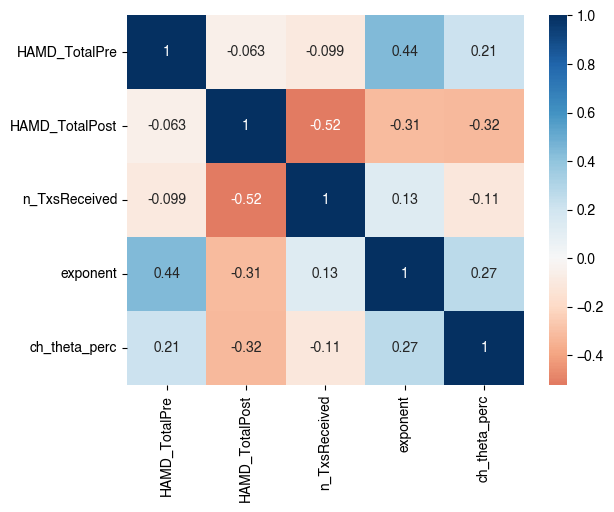

In [57]:
sns.heatmap(responders_df[features].corr(), cmap='RdBu', center=0, annot=True)

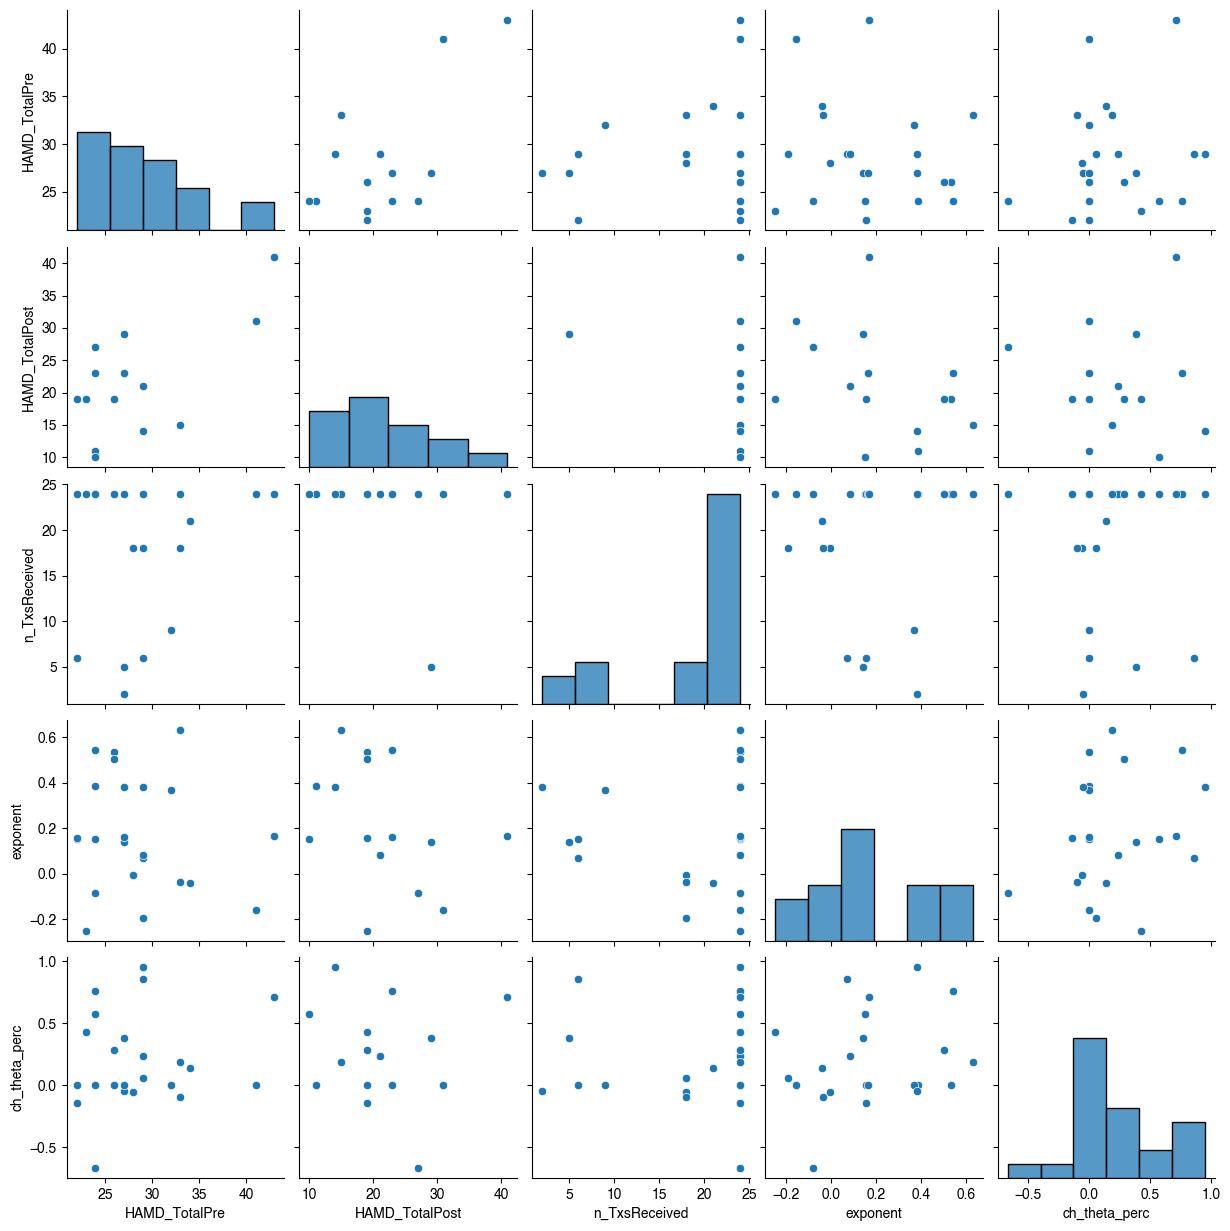

In [47]:
sns.pairplot(MST_clin_eeg_diff[features])

/Users/sydneysmith/opt/anaconda3/envs/mst-ect/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exponent', ylabel='HAMD_diff'>

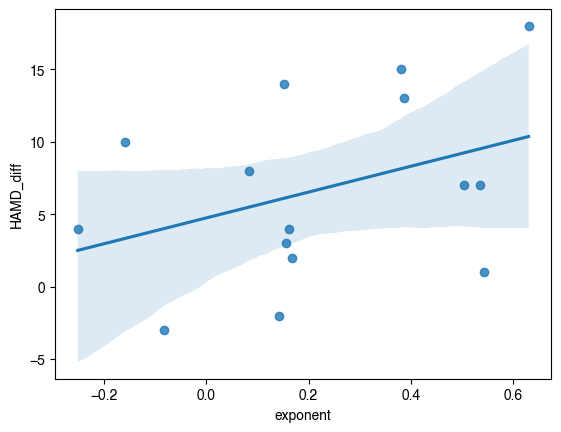

In [37]:
sns.regplot(MST_clin_eeg_diff['exponent'], MST_clin_eeg_diff['HAMD_diff'])

/Users/sydneysmith/opt/anaconda3/envs/mst-ect/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exponent', ylabel='HAMD_TotalPost'>

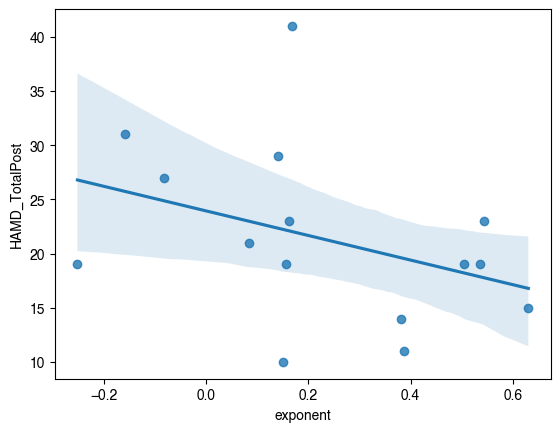

In [28]:
sns.regplot(MST_clin_eeg_diff['exponent'], MST_clin_eeg_diff['HAMD_TotalPost'])

In [30]:
MST_clin_eeg_diff.columns

Index(['patient', 'HAMD_TotalPre', 'HAMD_TotalPost', 'n_TxsReceived',
       'HAMD_diff', 'HAMD_ratio', 'delta_cf', 'delta_bw', 'delta_amp',
       'delta_bp', 'theta_cf', 'theta_bw', 'theta_amp', 'theta_bp', 'alpha_cf',
       'alpha_bw', 'alpha_amp', 'alpha_bp', 'offset', 'exponent',
       'delta_present', 'ch_delta_perc', 'theta_present', 'ch_theta_perc'],
      dtype='object')